In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,f1_score,confusion_matrix,matthews_corrcoef
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
csv_file_name = "heart_final.csv"


In [ ]:
df = pd.read_csv("heart_final.csv")
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [ ]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


-----------------Unique Values per column--------------------------------




age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

In [ ]:
df ['chest pain type'].value_counts()

chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64

In [ ]:
df ['resting ecg'].value_counts()

resting ecg
0    684
2    325
1    181
Name: count, dtype: int64

In [ ]:
df ['ST slope'].value_counts()

ST slope
2    582
1    526
3     81
0      1
Name: count, dtype: int64

In [ ]:
df.describe(include=[np.number])

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


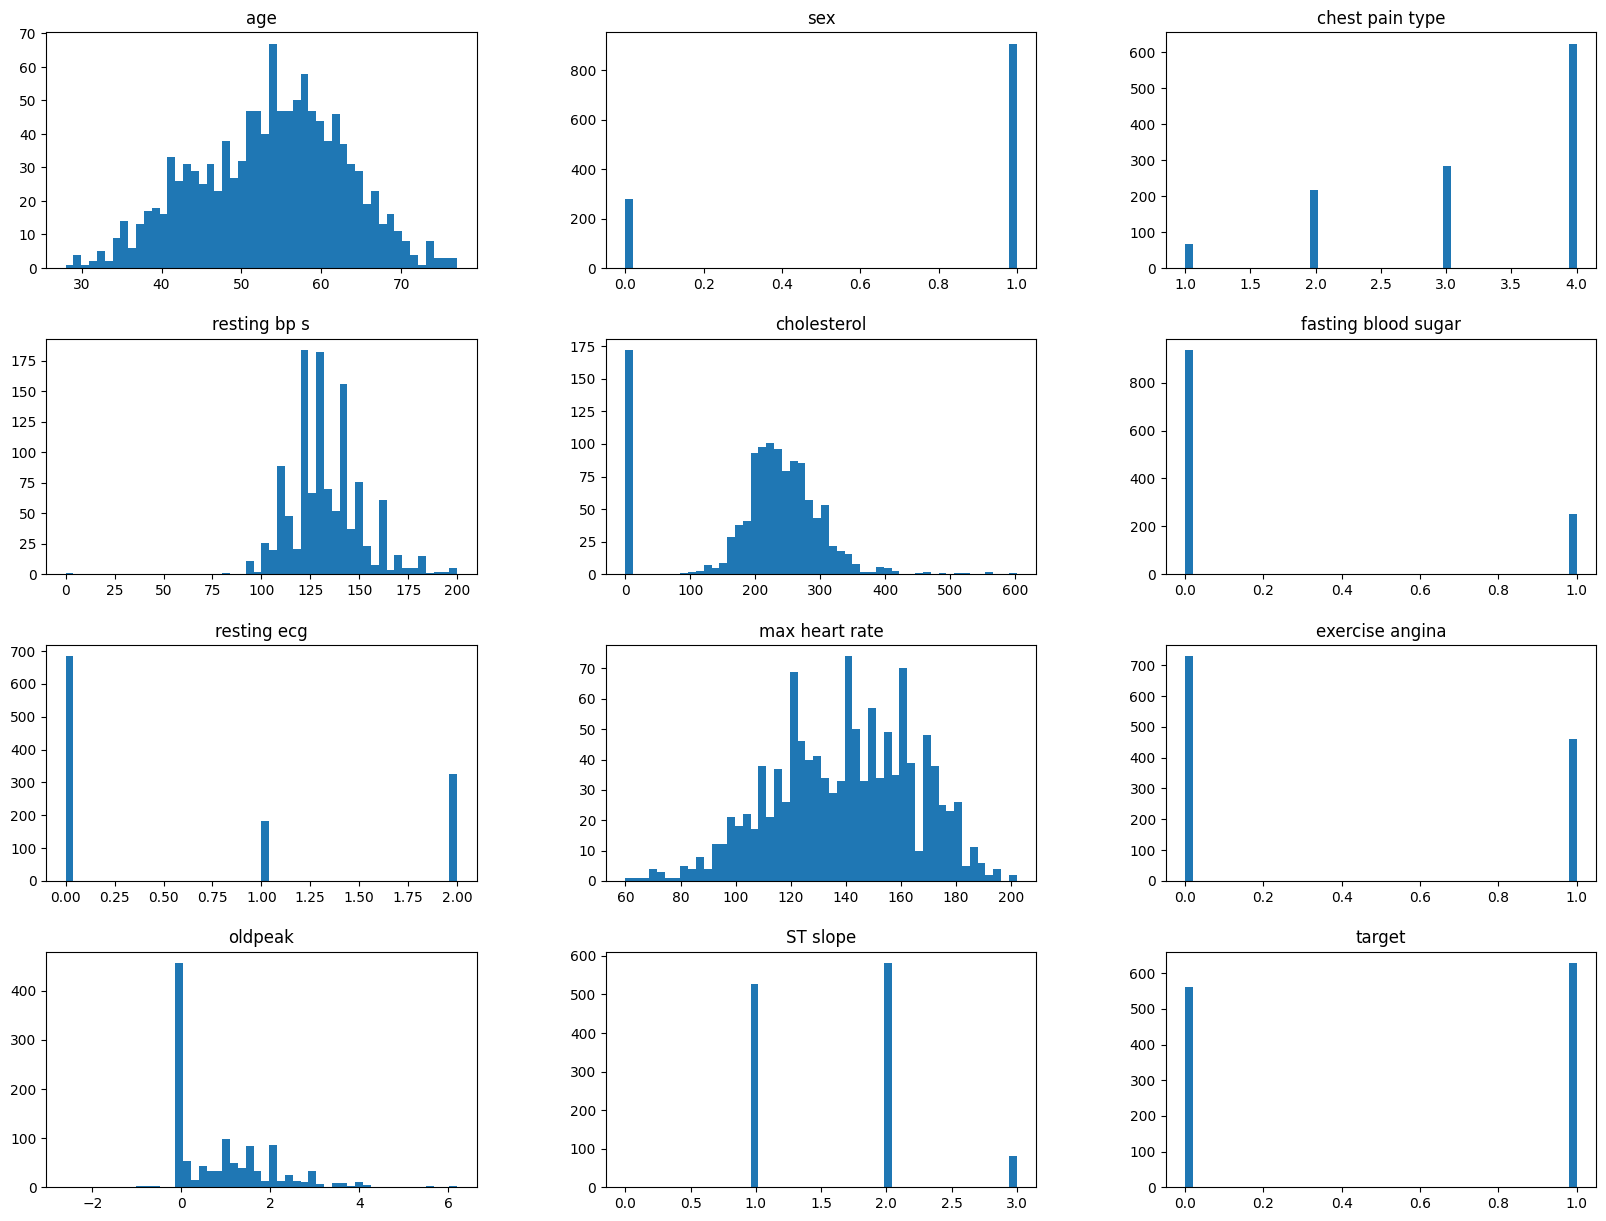

In [ ]:
#plotting histogram of all numeric values
df.hist(bins = 50, grid = False, figsize=(20,15));

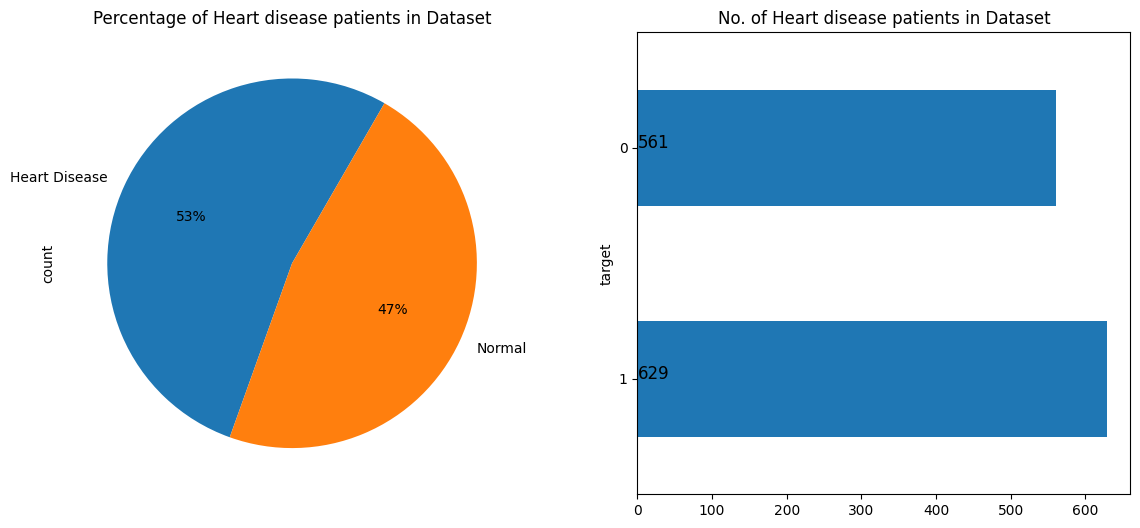

In [ ]:
#Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))
ax1 = df['target'].value_counts().plot.pie( x="Heart disease" ,y = 'no.of patients',
autopct = "%1.0f%%" ,labels=["Heart Disease", "Normal"], startangle = 60, ax=ax1);
ax1.set (title = 'Percentage of Heart disease patients in Dataset')

ax2 = df["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df["target"].value_counts().values):
  ax2. text (.5, i, j, fontsize=12)
ax2.set (title = 'No. of Heart disease patients in Dataset')
plt.show()

<ipython-input-133-221951549efb>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(df['age'], rug=True)


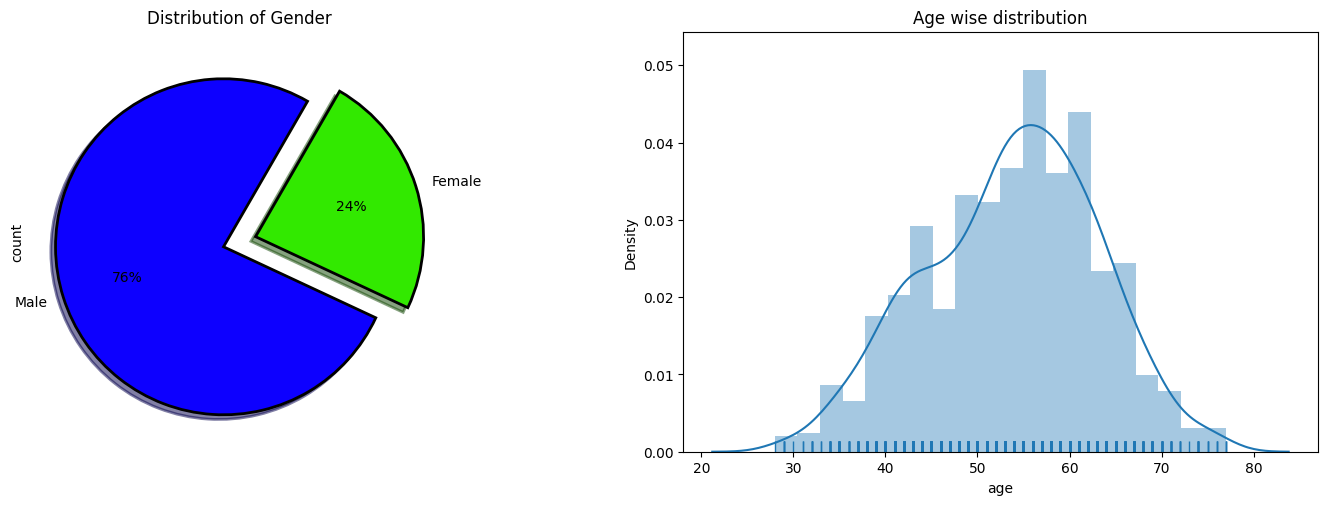

In [ ]:
plt.figure(figsize=(18,12))
plt. subplot(221)
df["sex"]. value_counts() .plot.pie(autopct = "%1.0f%%",colors=sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth" :2, "edgecolor": "k"}, explode=[.1,.1], shadow =True)
plt.title("Distribution of Gender")
plt. subplot (222)
ax= sns.distplot(df['age'], rug=True)
plt.title("Age wise distribution")
plt .show()

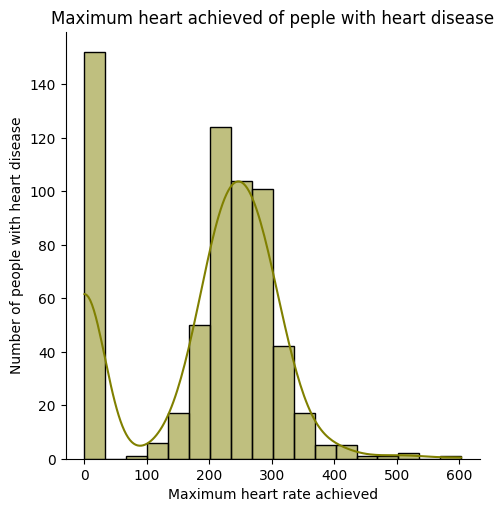

In [ ]:
sns.displot(x = df.cholesterol[df.target==1], data = df, kde = True, color= 'olive')
plt.title("Maximum heart achieved of peple with heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people with heart disease");

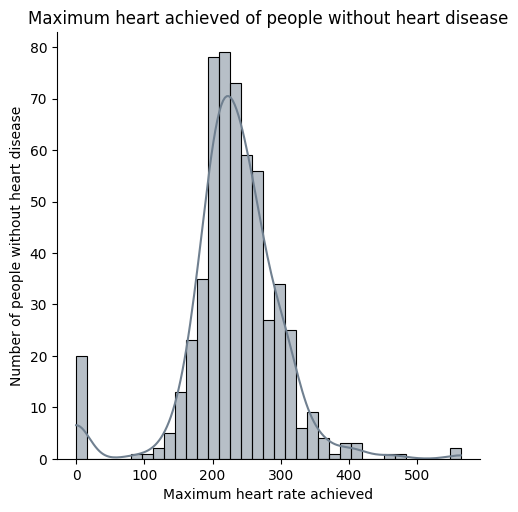

In [ ]:
sns.displot(x = df.cholesterol[df.target==0], data = df, kde = True, color= 'slategray')
plt.title("Maximum heart achieved of people without heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people without heart disease");

In [ ]:
X=df.drop(columns='target',axis=1)
Y=df['target']

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.dtypes)
print(X_test.dtypes)

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
dtype: object
age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
dtype: object


In [ ]:
print('Distribution of target variable in training set')
print (y_train.value_counts())

print('Distribution of target variable in test set')
print (y_test.value_counts())

Distribution of target variable in training set
target
1    498
0    454
Name: count, dtype: int64
Distribution of target variable in test set
target
1    131
0    107
Name: count, dtype: int64


In [ ]:
print('Training Set')
print(X_train.shape)
print(y_train.shape)

print('Test Ste')
print(X_test.shape)
print(y_test.shape)

Training Set
(952, 11)
(952,)
Test Ste
(238, 11)
(238,)


In [ ]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc =svc.predict(X_test)

In [ ]:
X_train_prediction = svc.predict(X_train)
trainig_data_accuracy =accuracy_score(X_train_prediction, y_train)

In [ ]:
X_test_prediction = svc.predict(X_test)
test_data_accuracy =accuracy_score(X_test_prediction, y_test)

In [ ]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc =decc.predict(X_test)

In [ ]:
CM=confusion_matrix(y_test,y_pred_svc)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

specificity= TN/(TN+FP)
acc=accuracy_score(y_test, y_pred_svc)
prec=precision_score(y_test, y_pred_svc)
f1=f1_score(y_test, y_pred_svc)
mathew= matthews_corrcoef(y_test, y_pred_svc)

model_results=pd.DataFrame([['SVM',acc,prec,f1,mathew]]),
columns= ['Model','Accuracy','Precision','F1 Score','matthews_corrcoef']

model_results

(     0         1         2         3         4
 0  SVM  0.848739  0.857143  0.863636  0.693947,)

In [ ]:
CM=confusion_matrix(y_test,y_pred_decc)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

specificity= TN/(TN+FP)
acc=accuracy_score(y_test, y_pred_decc)
prec=precision_score(y_test, y_pred_decc)
f1=f1_score(y_test, y_pred_decc)
mathew= matthews_corrcoef(y_test, y_pred_decc)

model_results=pd.DataFrame([['DT',acc,prec,f1,mathew]]),
columns= ['Model','Accuracy','Precision','F1 Score','matthews_corrcoef']

model_results

(    0         1         2         3         4
 0  DT  0.890756  0.926829  0.897638  0.782552,)

In [ ]:
# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)



Accuracy: 0.9453781512605042


In [ ]:
# Display the first few rows
print(data.head())

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [ ]:
# Preprocessing the data
# Separating features and target
X = data.drop(columns=['target'])
y = data['target']

In [ ]:
# One-hot encoding the target variable if necessary
y = to_categorical(y)

In [ ]:
# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Building the ANN model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Making predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Evaluating accuracy
test_accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Prediction Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/200
24/24 [==============================] - 3s 18ms/step - loss: 0.5893 - accuracy: 0.7083 - val_loss: 0.5549 - val_accuracy: 0.7749
Epoch 2/200
24/24 [==============================] - 0s 5ms/step - loss: 0.5022 - accuracy: 0.7792 - val_loss: 0.5004 - val_accuracy: 0.7644
Epoch 3/200
24/24 [==============================] - 0s 9ms/step - loss: 0.4542 - accuracy: 0.8213 - val_loss: 0.4713 - val_accuracy: 0.7644
Epoch 4/200
24/24 [==============================] - 0s 13ms/step - loss: 0.4310 - accuracy: 0.8239 - val_loss: 0.4570 - val_accuracy: 0.7749
Epoch 5/200
24/24 [==============================] - 0s 12ms/step - loss: 0.4227 - accuracy: 0.8226 - val_loss: 0.4516 - val_accuracy: 0.7749
Epoch 6/200
24/24 [==============================] - 0s 7ms/step - loss: 0.4105 - accuracy: 0.8397 - val_loss: 0.4479 - val_accuracy: 0.7749
Epoch 7/200
24/24 [==============================] - 0s 13ms/step - loss: 0.4034 - accuracy: 0.8463 - val_loss: 0.4455 - val_accuracy: 0.7696
Epoch 8/2